# Lab Exercise 1

In [1]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# read in Coaches data and create data frame from excel file
Coaches = pd.read_excel("coaches_modify.xlsx")

print(pd.DataFrame.head(Coaches))

Coaches.describe() #print descriptive statistics

              School      Conf              Coach  NCAAFBREV16  MedianConfSal  \
0          Air Force  Mt. West       Troy Calhoun   59577780.0       879288.0   
1              Akron       MAC       Terry Bowden   35331217.0       492413.0   
2            Alabama       SEC         Nick Saban  174307419.0      3929800.0   
3  Appalachian State  Sun Belt  Scott Satterfield   35058621.0       675000.0   
4            Arizona    Pac-12       Kevin Sumlin   90976758.0      2752232.5   

   SchoolPay   TotalPay      Bonus  BonusPaid  PayPlusBonus2016  ...  GSRank  \
0   885000.0   885000.0   247000.0        NaN          885000.0  ...      97   
1   411000.0   412500.0   225000.0    50000.0          462500.0  ...       5   
2  8307000.0  8307000.0  1100000.0   500000.0         8807000.0  ...      84   
3   712500.0   712500.0   295000.0   145000.0          857500.0  ...      13   
4  1600000.0  2000000.0  2025000.0        NaN         2000000.0  ...      60   

   Combo Rank  TrueRank     W   

,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
count,9.900000e+01,1.180000e+02,1.130000e+02,1.130000e+02,9.600000e+01,6.300000e+01,1.140000e+02,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,8.292182e+07,2.301919e+06,2.550025e+06,2.557438e+06,9.175975e+05,2.011909e+05,2.679926e+06,53059.228814,74.644068,67.245763,65.152542,65.666667,62.203390,6.775701,5.981308,1.865069,0.787757,0.827009,1.614579,76.364673
std,4.768607e+07,1.313944e+06,1.906396e+06,1.910683e+06,6.500860e+05,2.640723e+05,1.999123e+06,23699.435546,14.246022,37.649289,38.479127,28.235948,37.878474,3.032243,2.441703,2.396191,6.030251,6.443782,9.220991,7.547450
min,1.613242e+07,4.924130e+05,3.900000e+05,3.900000e+05,5.000000e+04,1.000000e+04,3.900000e+05,9214.000000,0.000000,1.000000,1.000000,10.666667,1.000000,1.000000,1.000000,0.090909,-13.010000,-11.120000,-18.860000,60.550000
25%,3.818882e+07,8.069122e+05,8.500000e+05,8.500000e+05,4.032500e+05,5.000000e+04,8.912500e+05,32062.000000,69.250000,36.250000,33.250000,42.916667,30.000000,4.000000,4.000000,0.500000,-3.460000,-3.370000,-5.700000,70.510000
50%,8.367264e+07,2.458032e+06,2.163000e+06,2.163000e+06,8.075000e+05,9.500000e+04,2.325603e+06,50035.500000,75.000000,66.500000,67.000000,66.333333,59.000000,7.000000,6.000000,1.166667,0.480000,0.290000,2.300000,75.160000
75%,1.146884e+08,3.775000e+06,3.703975e+06,3.703975e+06,1.263750e+06,2.770835e+05,3.946500e+06,66680.000000,83.750000,98.750000,100.000000,85.333333,95.500000,9.000000,8.000000,2.250000,4.835000,5.010000,8.170000,81.130000
max,2.148306e+08,3.929800e+06,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,8.807000e+06,107601.000000,100.000000,130.000000,130.000000,126.333333,129.000000,14.000000,11.000000,14.000000,14.640000,17.620000,25.620000,92.540000


In [3]:
Coaches = pd.DataFrame(Coaches) #view dataframe with pandas
Coaches

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,NaN,885000.0,...,97,64.666667,67,10.0,3.0,3.333333,4.96,-0.87,4.09,78.16
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,...,5,10.666667,129,5.0,7.0,0.714286,-0.40,-6.12,-6.52,72.64
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,...,84,111.333333,5,14.0,1.0,14.000000,8.01,17.62,25.62,90.38
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,...,13,19.666667,122,10.0,3.0,3.333333,-0.86,9.68,8.83,70.76
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,NaN,2000000.0,...,60,65.666667,62,3.0,9.0,0.333333,1.01,-5.64,-4.63,74.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Washington State,Pac-12,Mike Leach,64294520.0,2752232.5,3500000.0,3500000.0,725000.0,75000.0,3575000.0,...,121,83.000000,37,8.0,5.0,1.600000,5.70,3.33,9.03,84.22
114,West Virginia,Big 12,Dana Holgorsen,110565870.0,3775000.0,3605000.0,3617500.0,1000000.0,90000.0,3707500.0,...,20,65.666667,62,10.0,3.0,3.333333,4.01,5.56,9.57,78.75
115,Western Michigan,MAC,Tim Lester,38516531.0,492413.0,800000.0,800000.0,346500.0,39250.0,839250.0,...,60,39.333333,100,13.0,1.0,13.000000,7.61,4.42,12.03,86.24
116,Wisconsin,Big Ten,Paul Chryst,143420668.0,3775000.0,3750000.0,3750000.0,NaN,290000.0,4040000.0,...,40,83.666667,32,11.0,3.0,3.666667,2.13,13.17,15.30,78.74


In [4]:
#Fill missing values as 0
Coaches.isna()
coaches = Coaches.fillna(0)
coaches.isna()


,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,...,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
pd.set_option('display.max_columns',None) #show all the columns 
coaches.head()

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,Graduation Rate (GSR),Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
0,Air Force,Mt. West,Troy Calhoun,59577780.0,879288.0,885000.0,885000.0,247000.0,0.0,885000.0,46692,83,60,97,64.666667,67,10.0,3.0,3.333333,4.96,-0.87,4.09,78.16
1,Akron,MAC,Terry Bowden,35331217.0,492413.0,411000.0,412500.0,225000.0,50000.0,462500.0,30000,45,20,5,10.666667,129,5.0,7.0,0.714286,-0.40,-6.12,-6.52,72.64
2,Alabama,SEC,Nick Saban,174307419.0,3929800.0,8307000.0,8307000.0,1100000.0,500000.0,8807000.0,101821,79,124,84,111.333333,5,14.0,1.0,14.000000,8.01,17.62,25.62,90.38
3,Appalachian State,Sun Belt,Scott Satterfield,35058621.0,675000.0,712500.0,712500.0,295000.0,145000.0,857500.0,24050,57,11,13,19.666667,122,10.0,3.0,3.333333,-0.86,9.68,8.83,70.76
4,Arizona,Pac-12,Kevin Sumlin,90976758.0,2752232.5,1600000.0,2000000.0,2025000.0,0.0,2000000.0,51811,74,73,60,65.666667,62,3.0,9.0,0.333333,1.01,-5.64,-4.63,74.42


In [6]:
coaches.rename(columns={'Graduation Rate (GSR)': 'GradRate'}, inplace=True)
coaches.columns #rename Grad column to take out (GSR)

Index(['School', 'Conf', 'Coach', 'NCAAFBREV16', 'MedianConfSal', 'SchoolPay',
       'TotalPay', 'Bonus', 'BonusPaid', 'PayPlusBonus2016', 'StadSize',
       'GradRate', 'Seat Rank', 'GSRank', 'Combo Rank', 'TrueRank', 'W', 'L',
       'Ratio', 'OffenceScore', 'Defense Score', 'Score', 'PointsPerGame'],
      dtype='object')

C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='StadSize', ylabel='Count'>

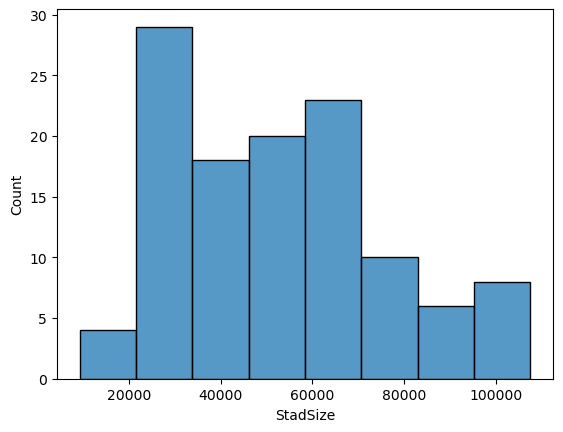

In [7]:
sns.histplot(data=coaches, x='StadSize') #view histogram of StadSize spread 

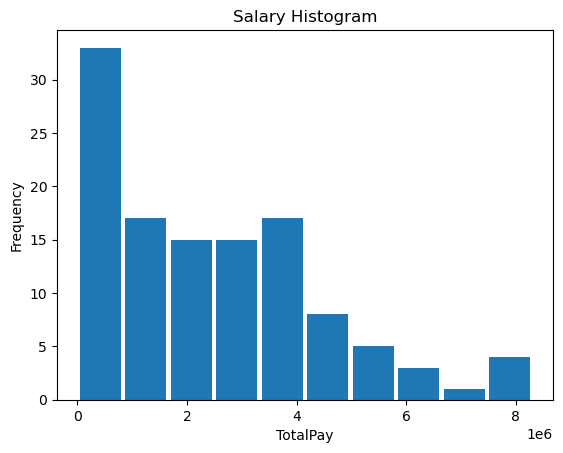

In [8]:
plt.hist(coaches['TotalPay'], stacked = False, rwidth = .9) 
plt.title("Salary Histogram")
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
#schoolpay distribution 
plt.show()


C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


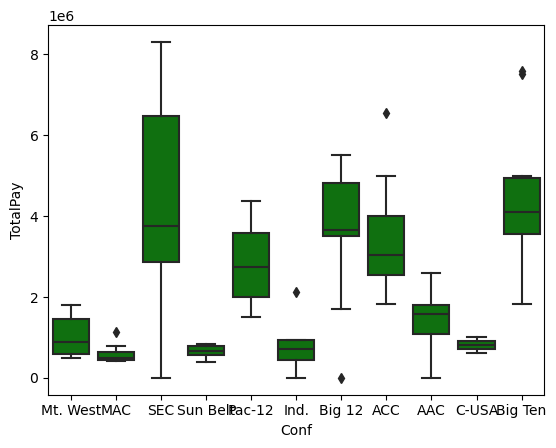

In [9]:
sns.boxplot(x='Conf', y='TotalPay', data=coaches, color='green')
plt.show() #totalpay spread for each conference

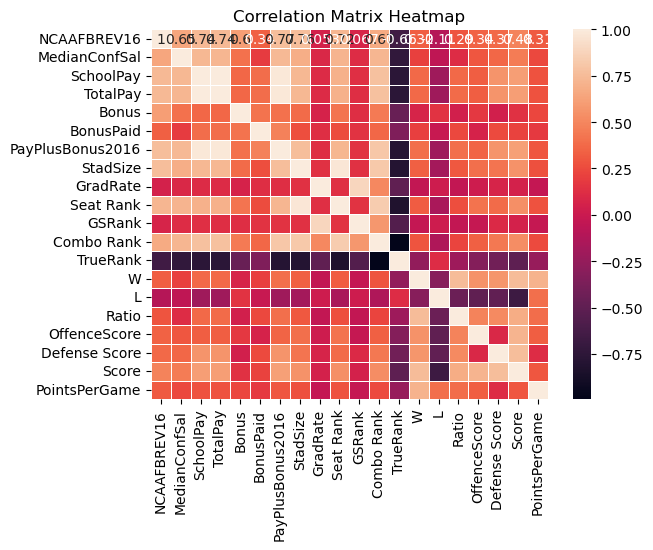

In [10]:
#Correlation Matrix 1
numeric_coaches = coaches.select_dtypes(include='number') #utilize only continuous variables
correlation_matrix = numeric_coaches.corr()

sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

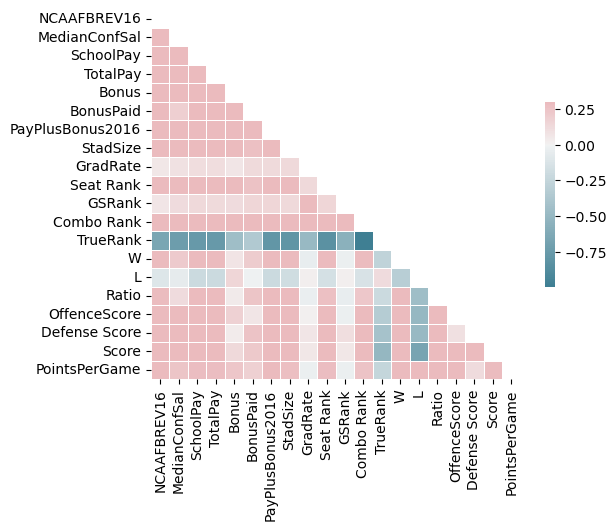

In [11]:
numeric_coaches = coaches.select_dtypes(include='number')
corr = numeric_coaches.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

The Correlation matrix above shows variables that have/don't have relationships with one another. This visualization gives us a good sense of which variables are relevant for TotalPay which is the salary response variable.

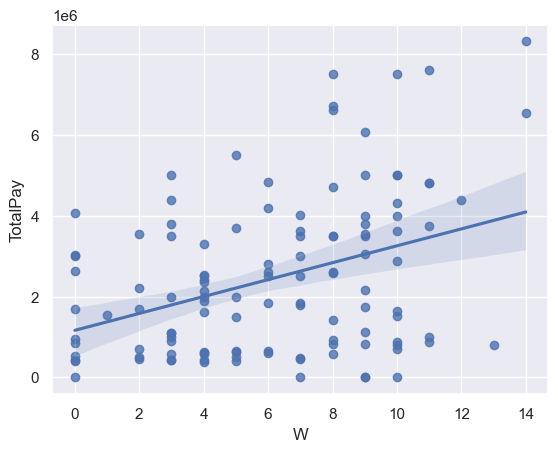

In [12]:
sns.set(color_codes=True)
sns.regplot(x='W', y='TotalPay', data=coaches, y_jitter=0.03)
plt.show()

#regression plot for Wins and TotalPay. displays a somewhat positive correlation

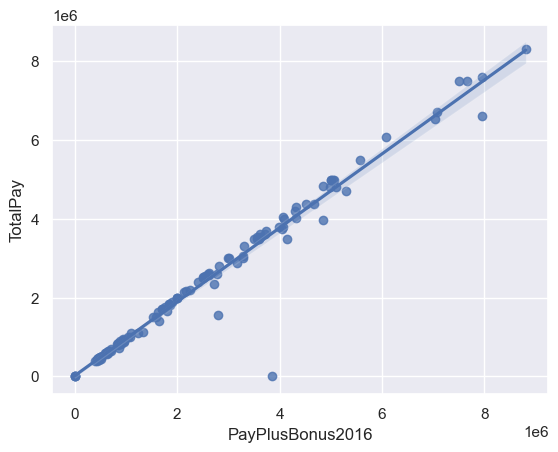

In [13]:
sns.set(color_codes=True)
sns.regplot(x='PayPlusBonus2016', y='TotalPay', data=coaches, y_jitter=0.03)
plt.show()

#payplusbonus2016 is highly correlation with salary.

The PayPlusBonus2016 variable has the biggest single impact on TotalPay (salary). 

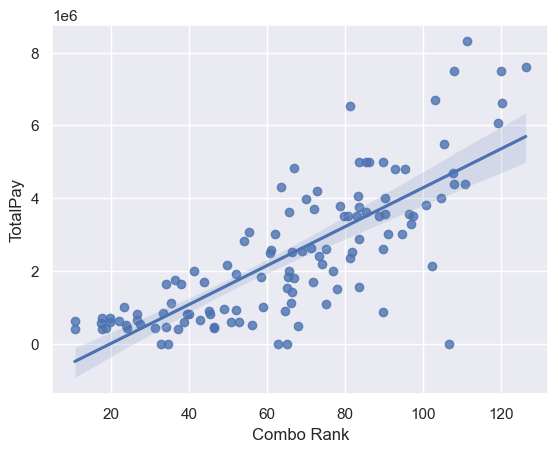

In [14]:
sns.set(color_codes=True)
sns.regplot(x='Combo Rank', y='TotalPay', data=coaches, y_jitter=0.03)
plt.show()

#combo rank and totalpay display a positive correlation

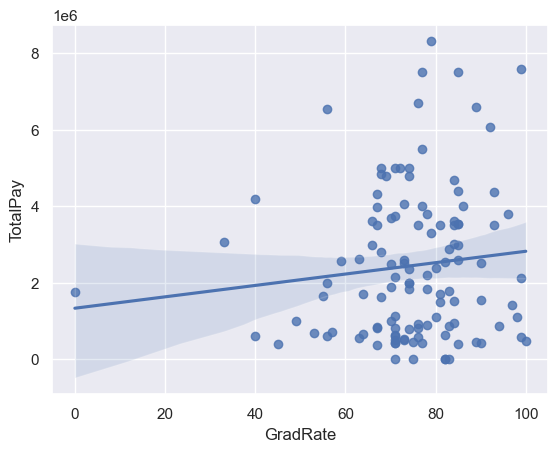

In [15]:
sns.set(color_codes=True)
sns.regplot(x='GradRate', y='TotalPay', data=coaches, y_jitter=0.03)
plt.show()

#gradrate seems to have hardly a postive correlation with salary

This would suggest that graduation rate is slightly has a significant effect on salary.

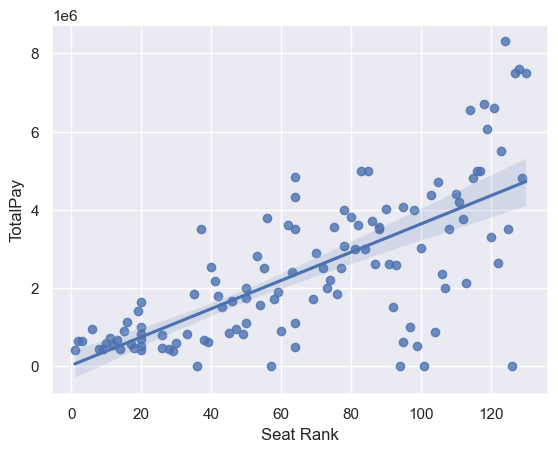

In [16]:
sns.set(color_codes=True)
sns.regplot(x='Seat Rank', y='TotalPay', data=coaches, y_jitter=0.03)
plt.show()

#Seat rank may not be as strongly correlation with salary as payplusbonus2016 and combo rank but it's highly correlated

In [17]:
X = coaches[['Combo Rank','PayPlusBonus2016']] #predictor variables
y = coaches['TotalPay'] #response variable

C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

Mean Squared Error: 584124654566.819


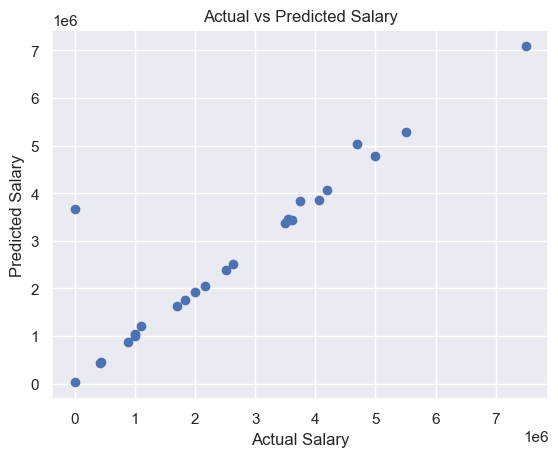

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() #use linear regression for model

model.fit(X_train, y_train) #fit the train and test data into the model
predictions = model.predict(X_test) 

mse = mean_squared_error(y_test, predictions) #display the mean squared error for predictions
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

Using the PayPlusBonus2016 and the Combo Rank, the model is fairly accurate in predicting coach salary. These predictor variables were highly correlated to totalpay through the regression plot and this graph supports those results. This model is great for predictions.

In [19]:
X = coaches[['Combo Rank','GradRate']] #predictor variables
y = coaches['TotalPay'] #response variable

C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

Mean Squared Error: 1555351891576.758


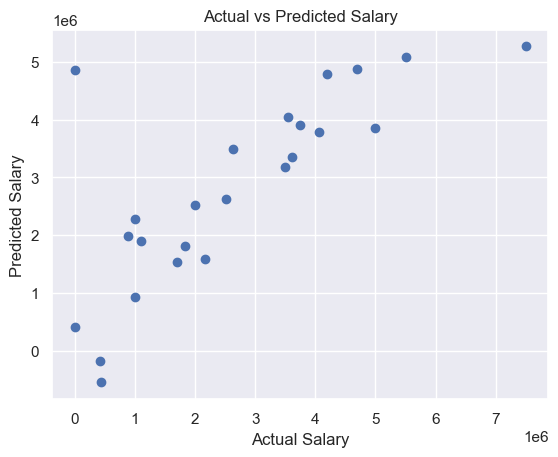

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() #use linear regression for model

model.fit(X_train, y_train) #fit the train and test data into the model
predictions = model.predict(X_test) 

mse = mean_squared_error(y_test, predictions) #display the mean squared error for predictions
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

GradRate and Combo Rank seem to maintain a good prediction rate of projected salary. This is due to the positive correlation between those predictor variables and TotalPay. The model is good for predictions.

C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

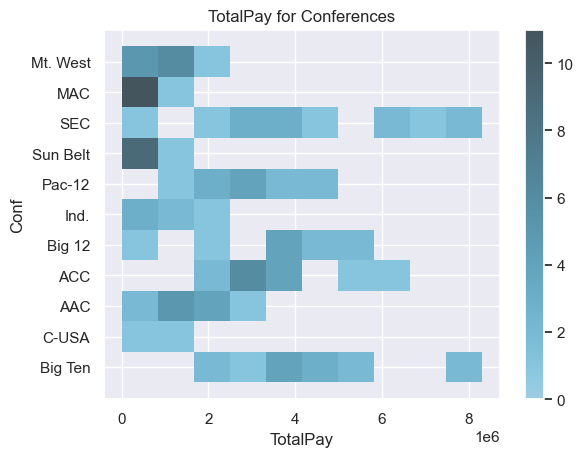

In [21]:
sns.histplot(data=coaches, x='TotalPay', y='Conf', bins=10, kde = True, color='skyblue', cbar=True)
plt.xlabel('TotalPay')
plt.ylabel('Conf')
plt.title('TotalPay for Conferences')
plt.show()

#pay distribution between the conferences

Syracuse is the school being observed. The chart above looks at the Pay distribution throughout the conferences. Dino Babers gets paid about 2.5 million which is on the lower end of ACC schools.

In [22]:
selected_rows = coaches[coaches['School'] == 'Syracuse'] #view the syracuse row
selected_rows

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,GradRate,Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
93,Syracuse,ACC,Dino Babers,0.0,2458032.5,2401206.0,2401206.0,0.0,0.0,2401206.0,49250,80,63,87,73.333333,49,4.0,8.0,0.5,0.08,-4.59,-4.51,75.51


The conferences being looked at are ACC and Big Ten. In this case, all other schools are dropped.

In [23]:
acc_conf = coaches[coaches['Conf']=='ACC']
acc_conf

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,GradRate,Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
13,Boston College,ACC,Steve Addazio,0.0,2458032.5,2514859.0,2514859.0,0.0,0.0,2514859.0,44500,90,55,117,81.666667,38,7.0,6.0,1.166667,-7.00,7.58,0.58,68.72
22,Clemson,ACC,Dabo Swinney,112600964.0,2458032.5,6205000.0,6543350.0,1125000.0,500000.0,7043350.0,81500,56,114,10,81.333333,39,14.0,1.0,14.000000,9.40,10.68,20.08,91.53
27,Duke,ACC,David Cutcliffe,0.0,2458032.5,2540928.0,2540928.0,0.0,0.0,2540928.0,33941,82,40,93,69.000000,55,4.0,8.0,0.500000,-3.03,1.67,-1.36,73.35
32,Florida State,ACC,Willie Taggart,144514413.0,2458032.5,5000000.0,5000000.0,1475000.0,0.0,5000000.0,82300,68,116,28,85.333333,30,10.0,3.0,3.333333,9.49,5.52,15.01,86.38
37,Georgia Tech,ACC,Paul Johnson,81762024.0,2458032.5,3060018.0,3060018.0,1330000.0,225000.0,3285018.0,55000,33,78,2,55.333333,77,9.0,4.0,2.250000,3.28,3.85,7.13,78.04
51,Louisville,ACC,Bobby Petrino,120445303.0,2458032.5,3980434.0,3980434.0,1472917.0,869917.0,4850351.0,55000,67,78,22,70.000000,54,9.0,4.0,2.250000,8.81,3.06,11.87,92.04
56,Miami (Fla.),ACC,Mark Richt,0.0,2458032.5,4058061.0,4058061.0,0.0,0.0,4058061.0,65000,73,95,55,83.333333,36,0.0,0.0,0.000000,0.00,0.00,0.00,0.00
70,North Carolina,ACC,Larry Fedora,96551626.0,2458032.5,2575000.0,2575000.0,900000.0,50000.0,2625000.0,62980,59,93,14,61.000000,72,8.0,5.0,1.600000,6.18,2.07,8.25,82.25
71,North Carolina State,ACC,Dave Doeren,83741572.0,2458032.5,3000000.0,3000000.0,1350000.0,275000.0,3275000.0,57583,66,81,20,62.000000,71,7.0,6.0,1.166667,0.69,6.81,7.49,76.44
82,Pittsburgh,ACC,Pat Narduzzi,0.0,2458032.5,3017718.0,3017718.0,0.0,0.0,3017718.0,68400,84,100,101,94.666667,20,0.0,0.0,0.000000,0.00,0.00,0.00,0.00


C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

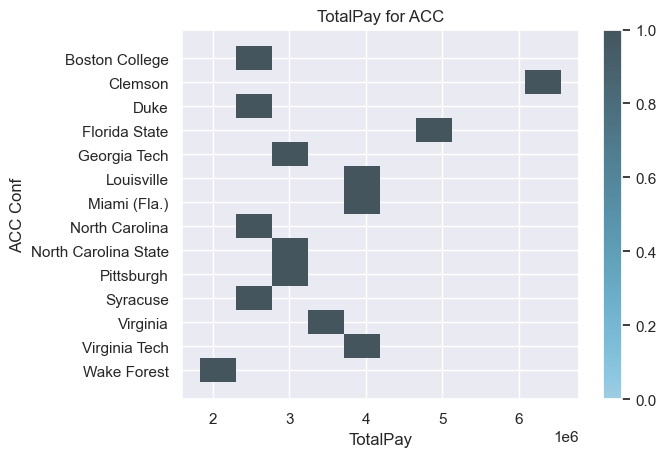

In [24]:
sns.histplot(data=acc_conf, x='TotalPay', y='School', bins=10, kde = True, color='skyblue', cbar=True)
plt.xlabel('TotalPay')
plt.ylabel('ACC Conf')
plt.title('TotalPay for ACC')
plt.show()

Considering the combo rank, gradrate and payplus for syracuse I would actually recommend about the same salary (2.5 million) as this data set. 

In [25]:
big_ten = coaches[coaches['Conf']=='Big Ten']
big_ten_sorted = big_ten.sort_values(by='TotalPay', ascending=False)
big_ten_sorted

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,GradRate,Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
76,Ohio State,Big Ten,Urban Meyer,185409602.0,3775000.0,7600000.0,7600000.0,775000.0,350000.0,7950000.0,104944,99,128,127,126.333333,1,11.0,2.0,5.500000,3.69,15.13,18.82,88.76
58,Michigan,Big Ten,Jim Harbaugh,185173187.0,3775000.0,7504000.0,7504000.0,1325000.0,150000.0,7654000.0,107601,85,130,107,120.000000,3,10.0,3.0,3.333333,4.71,12.85,17.56,90.05
40,Illinois,Big Ten,Lovie Smith,97447731.0,3775000.0,5000000.0,5000000.0,1000000.0,50000.0,5050000.0,60670,72,85,52,83.666667,32,3.0,9.0,0.333333,-5.92,-1.83,-7.75,69.69
65,Nebraska,Big Ten,Scott Frost,120205090.0,3775000.0,5000000.0,5000000.0,950000.0,0.0,5000000.0,87091,71,117,40,89.666667,25,9.0,4.0,2.250000,-0.90,8.45,7.55,73.76
81,Penn State,Big Ten,James Franklin,144017055.0,3775000.0,4800000.0,4800000.0,1000000.0,300000.0,5100000.0,106572,69,129,33,92.666667,21,11.0,3.0,3.666667,11.63,4.09,15.72,87.46
42,Iowa,Big Ten,Kirk Ferentz,130681467.0,3775000.0,4700000.0,4700000.0,2875000.0,600000.0,5300000.0,70585,84,105,101,107.666667,9,8.0,5.0,1.600000,-0.51,7.31,6.81,74.25
59,Michigan State,Big Ten,Mark Dantonio,126021377.0,3775000.0,4390417.0,4390417.0,650000.0,125000.0,4515417.0,75005,85,110,107,108.000000,7,3.0,9.0,0.333333,-1.21,-0.58,-1.79,74.72
83,Purdue,Big Ten,Jeff Brohm,84841133.0,3775000.0,3800000.0,3800000.0,1290000.0,180000.0,3980000.0,56400,96,80,124,100.666667,15,3.0,9.0,0.333333,0.20,-9.16,-8.96,73.85
116,Wisconsin,Big Ten,Paul Chryst,143420668.0,3775000.0,3750000.0,3750000.0,0.0,290000.0,4040000.0,80321,71,112,40,83.666667,32,11.0,3.0,3.666667,2.13,13.17,15.30,78.74
73,Northwestern,Big Ten,Pat Fitzgerald,0.0,3775000.0,3619775.0,3619775.0,0.0,0.0,3619775.0,47130,84,62,101,85.333333,30,7.0,6.0,1.166667,0.48,4.98,5.46,75.16


The Big Ten conference earn higher than ACC on average. In spite of this, teams within this rank with similar combo rank to syracuse earn about the same.

C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

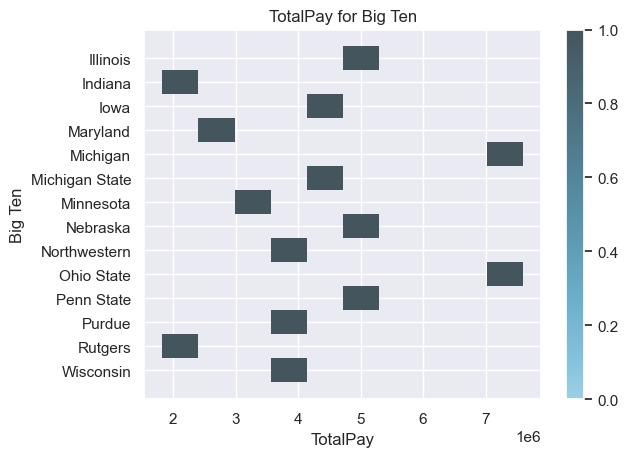

In [26]:
sns.histplot(data=big_ten, x='TotalPay', y='School', bins=10, kde = True, color='skyblue', cbar=True)
plt.xlabel('TotalPay')
plt.ylabel('Big Ten')
plt.title('TotalPay for Big Ten')
plt.show()

C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tofaj\Downloads\New folder\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

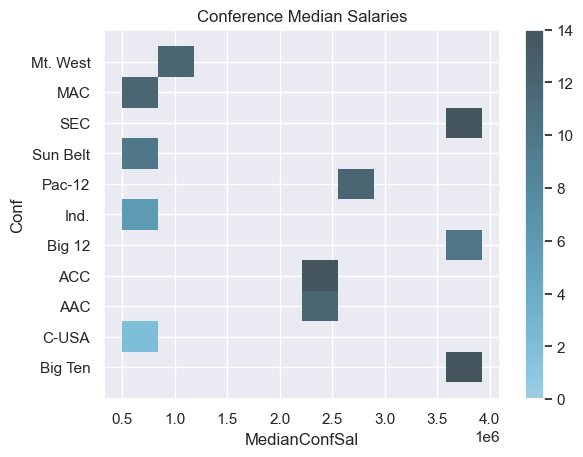

In [27]:
sns.histplot(data=coaches, x='MedianConfSal', y='Conf', bins=10, kde = True, color='skyblue', cbar=True)
plt.xlabel('MedianConfSal')
plt.ylabel('Conf')
plt.title('Conference Median Salaries')
plt.show()

In [28]:
salary_sorted = acc_conf.sort_values(by='TotalPay', ascending=False)
salary_sorted
#Salary ranked in descending order

,School,Conf,Coach,NCAAFBREV16,MedianConfSal,SchoolPay,TotalPay,Bonus,BonusPaid,PayPlusBonus2016,StadSize,GradRate,Seat Rank,GSRank,Combo Rank,TrueRank,W,L,Ratio,OffenceScore,Defense Score,Score,PointsPerGame
22,Clemson,ACC,Dabo Swinney,112600964.0,2458032.5,6205000.0,6543350.0,1125000.0,500000.0,7043350.0,81500,56,114,10,81.333333,39,14.0,1.0,14.000000,9.40,10.68,20.08,91.53
32,Florida State,ACC,Willie Taggart,144514413.0,2458032.5,5000000.0,5000000.0,1475000.0,0.0,5000000.0,82300,68,116,28,85.333333,30,10.0,3.0,3.333333,9.49,5.52,15.01,86.38
56,Miami (Fla.),ACC,Mark Richt,0.0,2458032.5,4058061.0,4058061.0,0.0,0.0,4058061.0,65000,73,95,55,83.333333,36,0.0,0.0,0.000000,0.00,0.00,0.00,0.00
110,Virginia Tech,ACC,Justin Fuente,87427526.0,2458032.5,4000000.0,4000000.0,435000.0,75000.0,4075000.0,66233,86,98,114,104.666667,12,10.0,4.0,2.500000,4.26,6.74,11.00,82.68
51,Louisville,ACC,Bobby Petrino,120445303.0,2458032.5,3980434.0,3980434.0,1472917.0,869917.0,4850351.0,55000,67,78,22,70.000000,54,9.0,4.0,2.250000,8.81,3.06,11.87,92.04
109,Virginia,ACC,Bronco Mendenhall,92865175.0,2458032.5,3550000.0,3550000.0,2165000.0,75000.0,3625000.0,61500,85,88,107,96.333333,18,2.0,10.0,0.200000,-4.34,-3.91,-8.25,70.74
37,Georgia Tech,ACC,Paul Johnson,81762024.0,2458032.5,3060018.0,3060018.0,1330000.0,225000.0,3285018.0,55000,33,78,2,55.333333,77,9.0,4.0,2.250000,3.28,3.85,7.13,78.04
82,Pittsburgh,ACC,Pat Narduzzi,0.0,2458032.5,3017718.0,3017718.0,0.0,0.0,3017718.0,68400,84,100,101,94.666667,20,0.0,0.0,0.000000,0.00,0.00,0.00,0.00
71,North Carolina State,ACC,Dave Doeren,83741572.0,2458032.5,3000000.0,3000000.0,1350000.0,275000.0,3275000.0,57583,66,81,20,62.000000,71,7.0,6.0,1.166667,0.69,6.81,7.49,76.44
70,North Carolina,ACC,Larry Fedora,96551626.0,2458032.5,2575000.0,2575000.0,900000.0,50000.0,2625000.0,62980,59,93,14,61.000000,72,8.0,5.0,1.600000,6.18,2.07,8.25,82.25


In [29]:
CPay = coaches.groupby(['Conf'])['TotalPay'].agg(['mean','median','min','max'])
ClPay = CPay.sort_values(by='mean', ascending=False)
ClPay.head(60)

,mean,median,min,max
Conf,,,,
SEC,4.368741e+06,3756800.0,0.0,8307000.0
Big Ten,4.304014e+06,4095208.5,1830000.0,7600000.0
Big 12,3.616330e+06,3660737.5,0.0,5500000.0
ACC,3.433797e+06,3038868.0,1831580.0,6543350.0
Pac-12,2.890119e+06,2752232.5,1500000.0,4377500.0
AAC,1.380223e+06,1573588.5,0.0,2600000.0
Mt. West,1.005938e+06,879288.0,486504.0,1800000.0
Ind.,8.215133e+05,716260.5,0.0,2129638.0
C-USA,8.125000e+05,812500.0,625000.0,1000000.0


The median salary of the ACC conference is the 4th highest among others. since Dino Babers is at the lower end of the ACC conference in terms of pay, it would make sense that it's lower than the average. From the analysis Combo Rank and PayPlusBonus2016 strongly predict salary. Graduation rate hardly has a positive correlation but having a higher grad rate does help. Since Syracuse isn't rated highly in any of these categories I would still recommend a salary arond 2.5 million. An increase in these categories would predict a higher salary.